In [1]:
import os,sys
from importlib import reload
import numpy as np
import torch
print(os.getpid())
sys.path.append(r'C:\Softwares\Github\MerScope01')

21612


In [2]:
from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

In [3]:
reload(dax_process)
reload(data_organization)


<module 'ChromAn.src.file_io.data_organization' from 'C:\\Softwares\\Github\\MerScope01\\ChromAn\\src\\file_io\\data_organization.py'>

In [4]:
data_folder = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x'

In [5]:
folders, fovs = data_organization.search_fovs_in_folders(data_folder)

- searching in folder: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x
-- 9 folders, 70 fovs detected.


In [ ]:
%%time
ref_filename = os.path.join(folders[0], fovs[1])
h1_filename = os.path.join(folders[1], fovs[1])

ims, channels = dax_process.load_image_base(os.path.join(folders[0], fovs[1]), verbose=True)

In [ ]:
%matplotlib notebook
reload(interactive)
vis = interactive.imshow_mark_3d(ims)

In [ ]:
from ChromAn.src.correction_tools import alignment
reload(alignment)

ref_filename = os.path.join(folders[0], fovs[1])
h1_filename = os.path.join(folders[1], fovs[1])

In [ ]:
analysis_folder = os.path.join(data_folder, 'Analysis')
color_usage_filename = os.path.join(analysis_folder, 'Color_Usage.csv')

In [ ]:
reload(data_organization)
color_df = data_organization.Color_Usage(color_usage_filename)#.set_index('Hyb')

In [ ]:
color_df

In [ ]:
color_df.get_fiducial_channel(color_df)

In [ ]:
color_df.get_dapi_channel(color_df)

# start here

In [34]:
reload(dax_process)

from ChromAn.src.file_io.dax_process import DaxProcesser
#correction_folder = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor_from_60_to_50'
correction_folder = r'C:\Data\Analysis\20210621-STORM6_lumencor_from_60_to_50'

In [7]:
ref_filename = os.path.join(folders[0], fovs[1])
h1_filename = os.path.join(folders[-2], fovs[1])

In [53]:
daxp = DaxProcesser(h1_filename, CorrectionFolder=correction_folder)
daxp._load_image()

Initialize DaxProcesser for file:\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H7C8\Conv_zscan_01.dax
-- all used channels: ['750', '647', '561', '488']
-- single image size: [  50 2048 2048]
- Loaded images for channels:['750', '647', '561', '488'] in 21.271s.


In [54]:
ref_daxp = DaxProcesser(ref_filename, CorrectionFolder=correction_folder)
ref_daxp._load_image()

Initialize DaxProcesser for file:\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H0C1\Conv_zscan_01.dax
-- all used channels: ['750', '647', '561', '488', '405']
-- single image size: [  50 2048 2048]
- Loaded images for channels:['750', '647', '561', '488', '405'] in 29.436s.


In [55]:
daxp._corr_bleedthrough()
daxp.correction_log, daxp.im_750.dtype

- Start bleedthrough correction for channels:['750', '647', '561', '488'].
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_488_2048_2048.npy


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Data\\Analysis\\20210621-STORM6_lumencor_from_60_to_50\\bleedthrough_correction_750_647_561_488_2048_2048.npy'

In [ ]:
daxp._corr_illumination()
daxp.correction_log, daxp.im_750.dtype

In [ ]:
daxp._corr_hot_pixels()
daxp.correction_log, daxp.im_750.dtype

In [ ]:
daxp._calculate_drift(RefImage=ref_daxp.im_488, overwrite=False)

In [40]:
daxp._warp_image(#ref_channel='647', 
                 correction_folder=r'C:\Data\Analysis\20210621-STORM6_lumencor_from_60_to_50',
                 warp_kwargs={'warp_order':1, 'border_mode':'grid-constant'},)

- Start warpping images drift:['750', '647', '561', '488'], chromatic:['750', '647', '561']
- Start 3D warpping for channels:['750', '647', '561', '488'].
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
	 561 chromatic_correction_561_647_50_2048_2048.npy
-- corrected warp for channel 750 in 26.618s.
-- corrected warp for channel 647 in 28.374s.
-- corrected warp for channel 561 in 26.318s.
-- corrected warp for channel 488 in 25.824s.
- Finished warp correction in 110.678s.


In [33]:
from ChromAn.src.correction_tools import illumination
reload(illumination)

<module 'ChromAn.src.correction_tools.illumination' from 'C:\\Softwares\\Github\\MerScope01\\ChromAn\\src\\correction_tools\\illumination.py'>

In [15]:
ref_daxp._corr_illumination(correction_channels=['488'])

- Correct illumination for channels: ['488']
-- Keep channels: ['488'] for corr_illumination.
- Start illumination correction for channels:['488'].
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- corrected illumination for channel 488 in 3.835s.
- Finished illumination correction in 4.129s.


In [16]:
ref_daxp._corr_hot_pixels()

- Correct hot_pixel for channels: ['750', '647', '561', '488', '405']
-- Keep channels: ['750', '647', '561', '488', '405'] for corr_hot_pixel.
- Start hot_pixel correction for channels:['750', '647', '561', '488', '405'].
-- corrected hot_pixel for channel 750 in 3.006s.
-- corrected hot_pixel for channel 647 in 3.068s.
-- corrected hot_pixel for channel 561 in 3.044s.
-- corrected hot_pixel for channel 488 in 7.014s.
-- corrected hot_pixel for channel 405 in 6.491s.
- Finished hot_pixel correction in 22.622s.


In [20]:
from ChromAn.src.correction_tools import translate
reload(translate)

<module 'ChromAn.src.correction_tools.translate' from 'C:\\Softwares\\Github\\MerScope01\\ChromAn\\src\\correction_tools\\translate.py'>

In [ ]:
translate.warp_3D_image

dtype('float64')

In [49]:
from ChromAn.src.correction_tools import filter
reload(filter)

<module 'ChromAn.src.correction_tools.filter' from 'C:\\Softwares\\Github\\MerScope01\\ChromAn\\src\\correction_tools\\filter.py'>

In [50]:
daxp._gaussian_highpass()

- Apply Gaussian highpass for channels: ['750', '647', '561', '488']
-- Keep channels: ['750', '647', '561', '488'] for gaussian_highpass.
- Start gaussian_highpass correction for channels:['750', '647', '561', '488'].
-- corrected gaussian_highpass for channel 750 in 10.076s.
-- corrected gaussian_highpass for channel 647 in 9.749s.
-- corrected gaussian_highpass for channel 561 in 10.636s.
-- corrected gaussian_highpass for channel 488 in 10.374s.
- Finished gaussian_highpass correction in 40.837s.


In [52]:
daxp.correction_log, daxp.im_750.dtype


({'750': {'corr_illumination': True,
   'corr_hot_pixel': True,
   'corr_drift': True,
   'corr_chromatic': True,
   'corr_gaussian_highpass': True},
  '647': {'corr_illumination': True,
   'corr_hot_pixel': True,
   'corr_drift': True,
   'corr_chromatic': True,
   'corr_gaussian_highpass': True},
  '561': {'corr_illumination': True,
   'corr_hot_pixel': True,
   'corr_drift': True,
   'corr_chromatic': True,
   'corr_gaussian_highpass': True},
  '488': {'corr_illumination': True,
   'corr_hot_pixel': True,
   'corr_drift': True,
   'corr_gaussian_highpass': True}},
 dtype('uint16'))

<IPython.core.display.Javascript object>


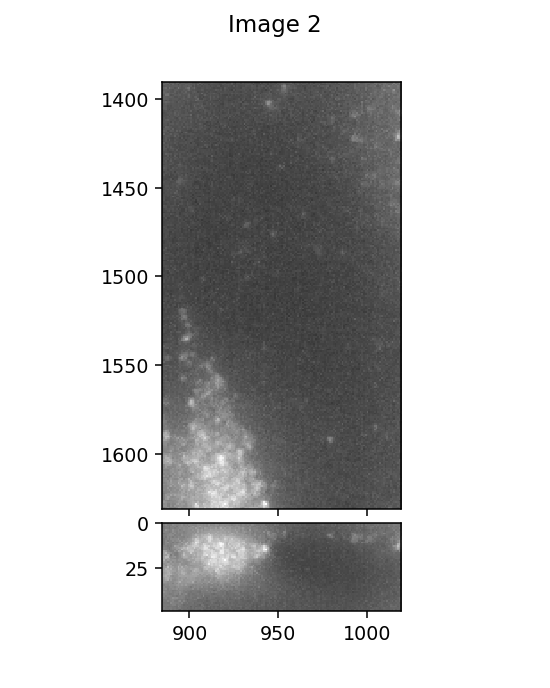

In [41]:
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_750, ref_daxp.im_750])

<IPython.core.display.Javascript object>


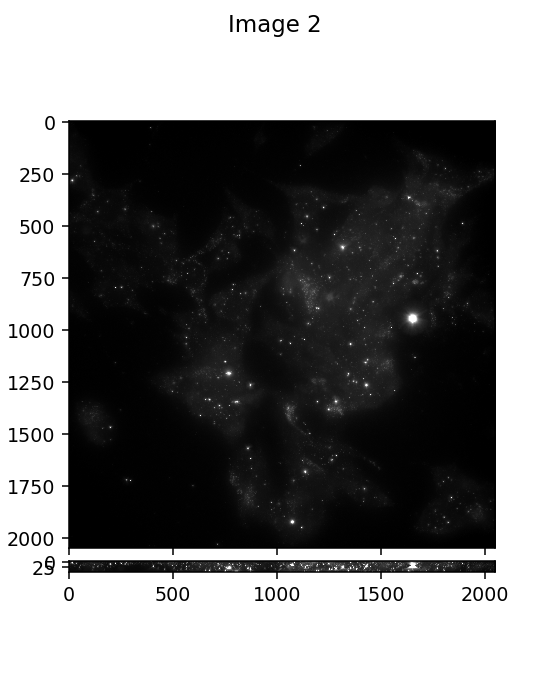

In [51]:
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_647, ref_daxp.im_647])

<IPython.core.display.Javascript object>


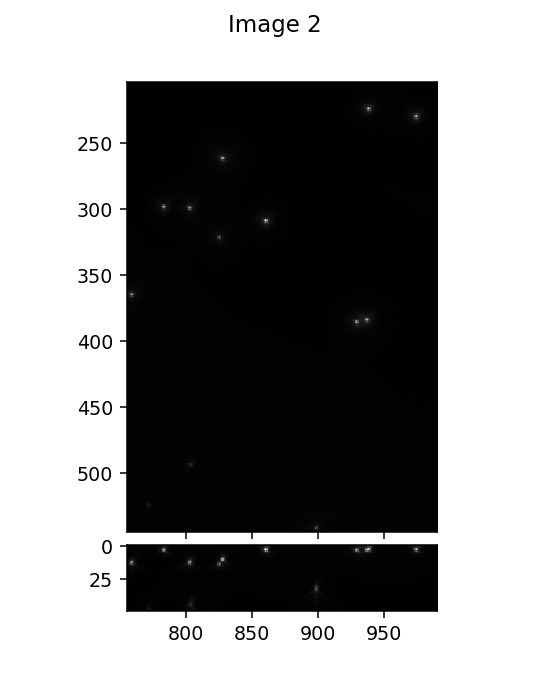

In [44]:
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_488, ref_daxp.im_488])

In [284]:
daxp._calculate_drift(RefImage=ref_daxp.im_488, overwrite=True)

+ Calculate drift with fiducial_channel: 488
-- start aligning given source image to given reference image.
-- drift 0: [ -0.32 -51.5  -11.2 ] in 2.340s.
-- drift 1: [ -0.11 -51.43 -11.16] in 2.416s.
-- drift 2: [ -0.13 -51.4  -11.07] in 2.409s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.


(array([ -0.18666667, -51.44333333, -11.14333333]), 0)

In [87]:
from ChromAn.src.correction_tools import load_corrections
reload(load_corrections)
from ChromAn.src.correction_tools.bleedthrough import bleedthrough_correction
from ChromAn.src.correction_tools.load_corrections import load_correction_profile

In [88]:
bleed_pf = load_correction_profile('bleedthrough', correction_folder=correction_folder)

In [89]:
corr_channels = ['750','647','561']
raw_ims = [getattr(daxp, f"im_{_ch}") for _ch in corr_channels]

In [28]:
_cims, _cchs = daxp._corr_bleedthrough(
    correction_channels=corr_channels,
    correction_pf=bleed_pf, 
    save_attrs=False)

- Start bleedthrough correction for channels:['750', '647', '561'].
-- corrected bleedthrough for channel 750 in 7.026s.
-- corrected bleedthrough for channel 647 in 6.963s.
-- corrected bleedthrough for channel 561 in 6.995s.
- finish bleedthrough correction in 20.986s. 


In [275]:
from ChromAn.src.correction_tools import illumination
reload(illumination)

<module 'ChromAn.src.correction_tools.illumination' from 'C:\\Softwares\\Github\\MerScope01\\ChromAn\\src\\correction_tools\\illumination.py'>

<IPython.core.display.Javascript object>


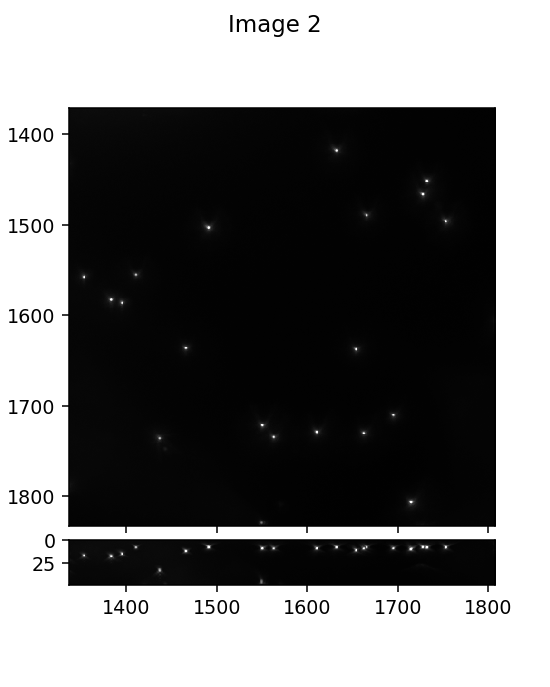

In [285]:
interactive.imshow_mark_3d([daxp.im_488, ref_daxp.im_488])

<IPython.core.display.Javascript object>


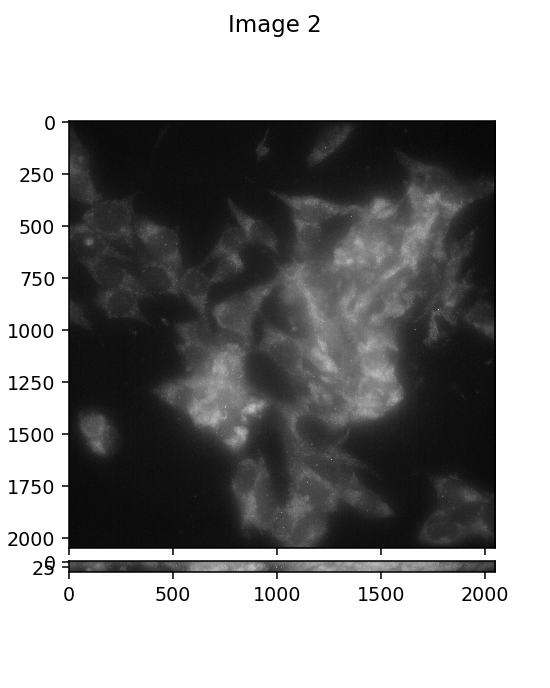

In [272]:
interactive.imshow_mark_3d([illu_corr_ims2[0], raw_ims[0]])

In [276]:
illu_corr_ims2 = illumination.illumination_correction(raw_ims, corr_channels,
                                                      correction_pf=illumination_pf)

- Start illumination correction for channels:['750', '647', '561'].
-- corrected illumination for channel 750 in 4.458s.
-- corrected illumination for channel 647 in 4.928s.
-- corrected illumination for channel 561 in 4.919s.
- Finished illumination correction in 14.306s.


In [252]:
illumination_pf = load_correction_profile('illumination', corr_channels=daxp.channels,
                                          correction_folder=correction_folder, )

In [253]:
illu_corr_ims = daxp._corr_illumination(correction_pf=illumination_pf, save_attrs=False)

- Correct illumination for channels: ['750', '647', '561', '488']
-- Keep channels: ['750', '647', '561', '488'] for corr_illumination.
-- corrected illumination for channel 750 in 4.836s.
-- corrected illumination for channel 647 in 5.151s.
-- corrected illumination for channel 561 in 5.212s.
-- corrected illumination for channel 488 in 5.501s.
- Finished illumination correction in 20.700s.


<IPython.core.display.Javascript object>


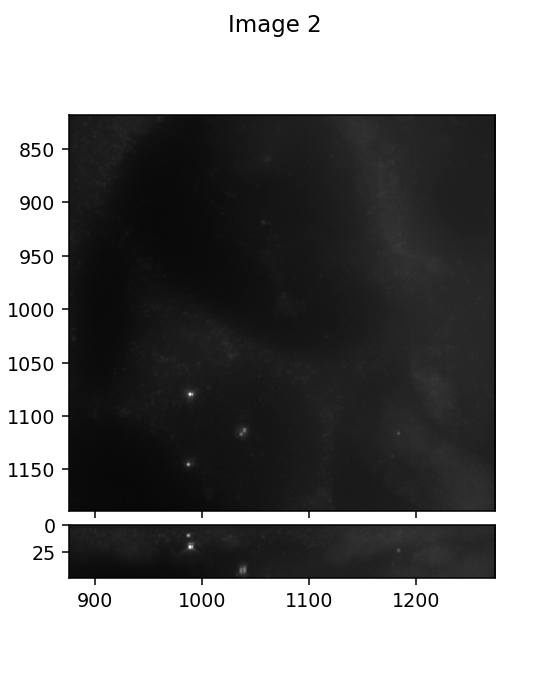

In [262]:
interactive.imshow_mark_3d([illu_corr_ims[0][1], daxp.im_647], min_max_default=[2000,10000])

<IPython.core.display.Javascript object>


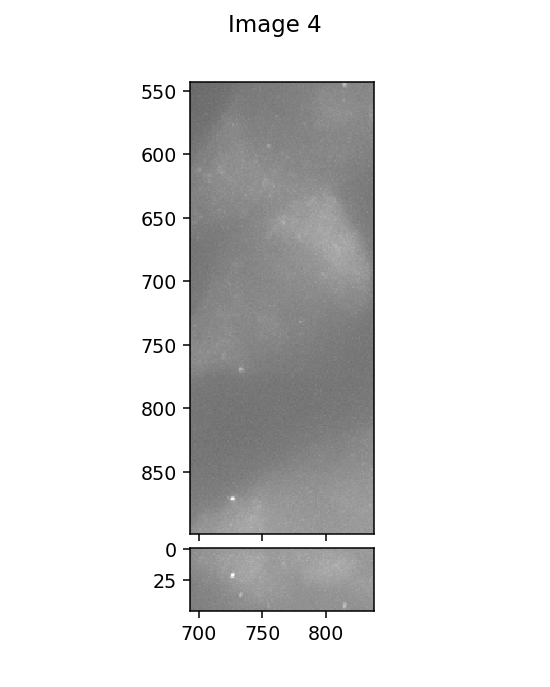

In [35]:
interactive.imshow_mark_3d([daxp.im_750, daxp.im_647, daxp.im_561, _cims[2]])

<IPython.core.display.Javascript object>


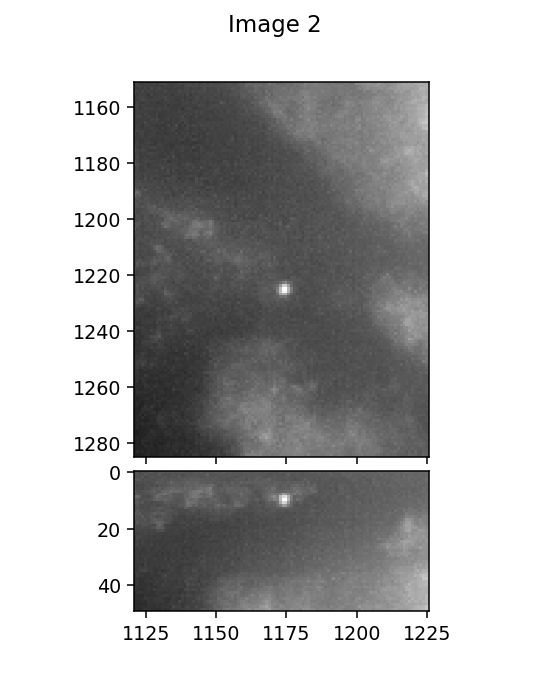

In [32]:
interactive.imshow_mark_3d([daxp.im_750, _cims[0], daxp.im_561, _cims[2]])

## Fitting

In [207]:
from ChromAn.src.spot_tools import spot_fitting,spot_class, bintu_fitting

In [221]:
from ChromAn.src.spot_tools import spot_fitting
reload(spot_fitting)
from ChromAn.src.spot_tools import spot_fitting,spot_class
from ChromAn.src.spot_tools.spot_class import Spots3D
reload(spot_class)
reload(bintu_fitting)

<module 'ChromAn.src.spot_tools.bintu_fitting' from 'C:\\Softwares\\Github\\MerScope01\\ChromAn\\src\\spot_tools\\bintu_fitting.py'>

In [243]:
fitter = spot_fitting.SpotFitter(daxp.im_647[:,:500,:500])
fitter.seeding(seeding_kwargs={'th_seed':2000})
fitter.CPU_fitting()

- start SpotFitter seeding
-- start seeding image, th=2000.00->2000.00, found 6 seeds in 1.55s


-- start fitting spots with 6 seeds, 6 fitted in 0.120s.


In [245]:
reload(interactive)

<module 'ChromAn.src.visual_tools.interactive' from 'C:\\Softwares\\Github\\MerScope01\\ChromAn\\src\\visual_tools\\interactive.py'>

<IPython.core.display.Javascript object>


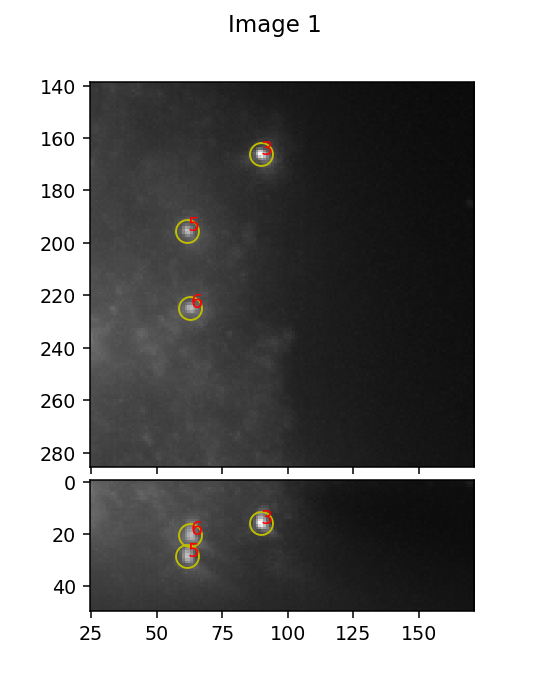

In [246]:
interactive.imshow_mark_3d([fitter.image],
                           use_dict={'coords':fitter.spots.to_coords(),
                                      'class_ids':np.zeros(len(fitter.spots)),})

array([[197.43034  , 436.0172   ,  29.309408 ],
       [ 91.27357  , 167.91946  ,  16.005302 ],
       [281.19775  , 474.3609   ,  14.236407 ],
       [177.52196  , 393.39948  ,  10.5      ],
       [175.65703  , 393.93323  ,  13.591315 ],
       [113.08677  , 444.03055  ,   7.4922075],
       [110.328125 , 448.5631   ,   7.1987605]], dtype=float32)

In [73]:
remove_edge_points(np.array(fitter.image.shape), seed_coords, distance=2)

Spots3D([[3950.,   10.,  905., 1772.],
         [3508.,   23., 1370.,  749.],
         [3469.,   40., 1623., 1260.],
         ...,
         [1002.,   20., 1289., 1580.],
         [1001.,   11.,  518.,  855.],
         [1000.,    7.,  725., 1560.]])

In [111]:
im3d = daxp.im_488.astype(np.float32)

In [114]:
from scipy.ndimage import median_filter

In [117]:
med_im3d = median_filter(im3d, 3)

<IPython.core.display.Javascript object>


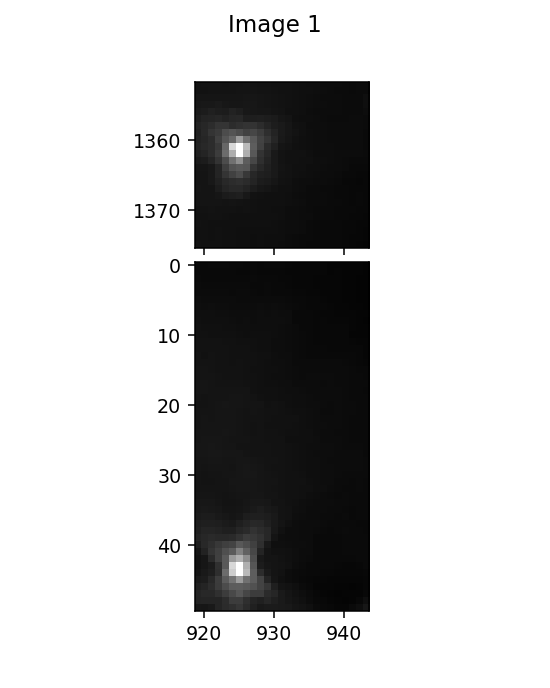

In [118]:
interactive.imshow_mark_3d([med_im3d, im3d])

In [113]:
input_= torch.tensor(im3d).cuda()

In [190]:
Spots3D(fitter.seeds)

Spots3D([[3950.,   10.,  905., 1772.],
         [3508.,   23., 1370.,  749.],
         [3469.,   40., 1623., 1260.],
         ...,
         [1002.,   20., 1289., 1580.],
         [1001.,   11.,  518.,  855.],
         [1000.,    7.,  725., 1560.]])

In [198]:
fitter.seeds[0].to_coords()

array([  10.,  905., 1772.])